## **INSTAGRAM DATASET**

### **EXPLORATORY DATA ANALYSIS**

**IMPORT LIBRARIES**

In [42]:
!pip install xgboost

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

**IMPORT DATASET**

In [44]:
df = pd.read_csv("D:\Downloads\instagram_reach.csv")

In [ ]:
df.to_csv("instagram.csv")

In [45]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


**CHECK INFO OF DATA**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


**There are missing Values on Caption Columns**

**Check Missing Values of Dataset**

In [47]:
df.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

**Check Statistical Information of Dataset**

In [48]:
df.describe(include = 'all')

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
count,100.000000,100.000000,100,94,100.00000,100,100,100.00000
unique,NaN,NaN,95,94,NaN,98,11,NaN
top,NaN,NaN,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,NaN
freq,NaN,NaN,4,1,NaN,2,57,NaN
mean,8.940000,16.240000,NaN,NaN,961.96000,NaN,NaN,46.48000
std,6.639064,7.384286,NaN,NaN,1014.62567,NaN,NaN,55.08698
min,0.000000,1.000000,NaN,NaN,11.00000,NaN,NaN,8.00000
25%,4.000000,10.750000,NaN,NaN,252.75000,NaN,NaN,19.00000
50%,8.000000,16.500000,NaN,NaN,612.00000,NaN,NaN,29.00000
75%,12.250000,22.250000,NaN,NaN,1197.00000,NaN,NaN,46.00000


### **DATA CLEANING**

**REMOVE UNNECCESSARY COLUMN FROM DATASET**

In [49]:
df.drop(['Unnamed: 0', 'S.No'], inplace = True, axis = 1)

In [50]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [51]:
df.shape

(100, 6)

**DEALING WITH MISSSING VALUES IN `CAPTION` COLUMN**

In [52]:
df = df.dropna()

In [53]:
df.shape

(94, 6)

**CHANGE THE DATATYPES**

- Times since posted will be better if in type of int/float, so it will be changed

In [54]:

Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df['Times since posted (hours)'] = se.values
df['Times since posted (hours)'] = pd.to_numeric(df['Times since posted (hours)'])
df = df.drop('Time since posted', axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Username                    94 non-null     object
 1   Caption                     94 non-null     object
 2   Followers                   94 non-null     int64 
 3   Hashtags                    94 non-null     object
 4   Likes                       94 non-null     int64 
 5   Times since posted (hours)  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


**DISTRIBUTION OF FOLLOWERS VARIABLE**

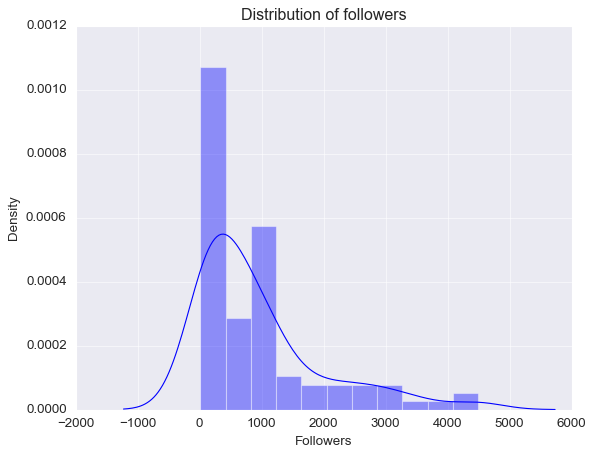

In [56]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Followers'])
plt.title("Distribution of followers")
plt.show()

- The followers distribution in right skewed. Most of the account has followers between 0-300 or more.

**Time_since_posted_in_hours variable**

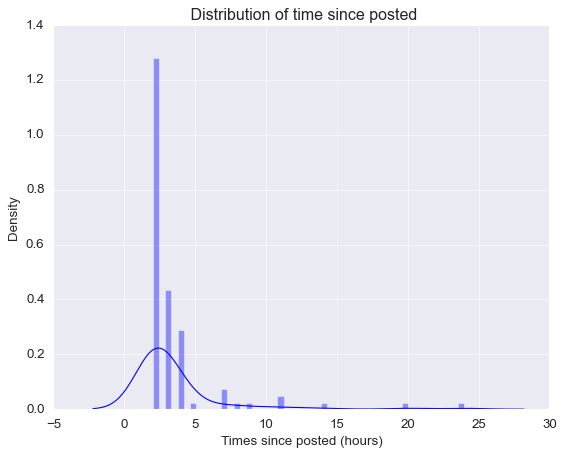

In [57]:
plt.figure(figsize=(8,6))
sns.distplot(df['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

- The Time_since_posted_hours distribution is right skewed.

**Username variable**

In [58]:
print(f"There are {df['Username'].nunique()} username.")

There are 90 username.


**Caption variables**

- In analyzing this variable, I will use wordcloud to know which words are mostly used in caption

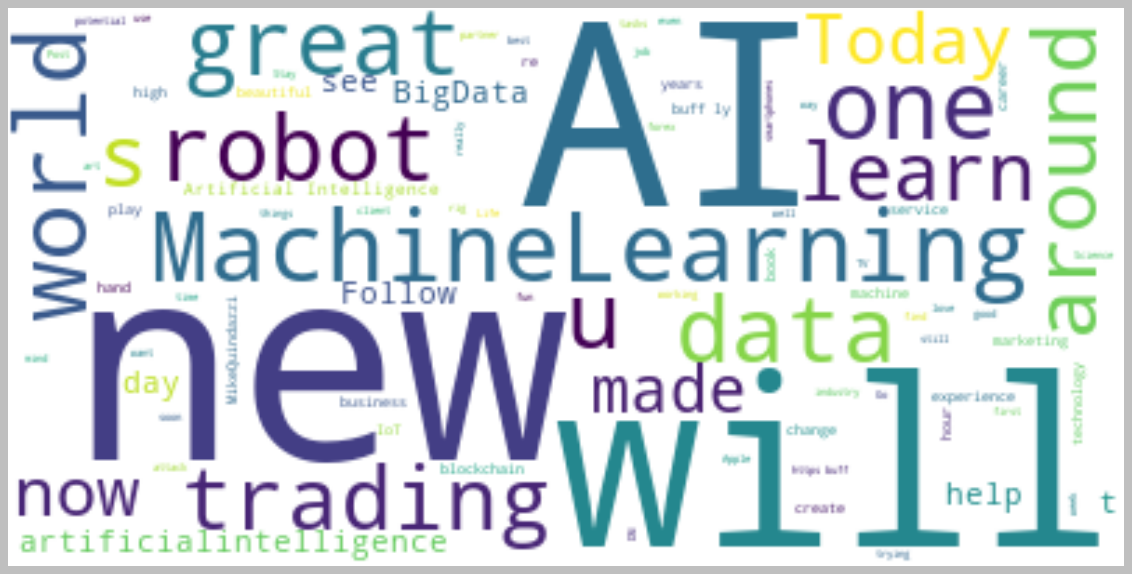

In [59]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- From wordcloud above we know that words like 'AI', 'will', 'new' are the top three words on caption.

**Hastags variable**

- In analyzing this variable, I will use wordcloud to know which words are mostly used in hastags

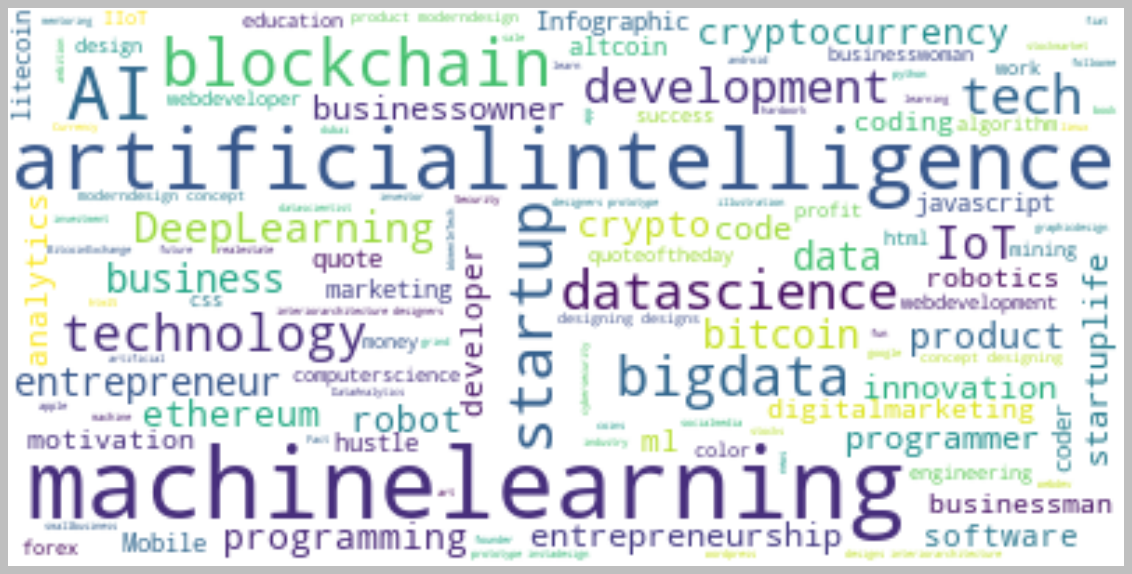

In [60]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- From wordcloud above we know that words like 'artificialintelligence', 'machinelearning', 'AI' are the top three words on hashtags

**Relationship between two variables**

*Times since posted in hours and likes*
- I will use scatterplot to visualize the relationship between these variables

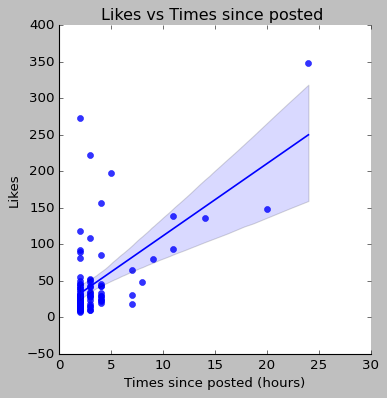

In [61]:
sns.lmplot(x='Times since posted (hours)', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

- There is linear relationship between times since posted and likes. Some data shows no relationship between these two.

**Followers and likes**
- I will use scatterplot to visualize the relationship between these variables

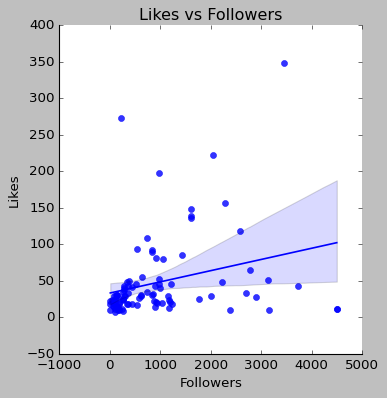

In [62]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

- There is linear relationship between these two variables

- Now I will find out the correlation values between times since posted, follower, and likes

In [63]:
num_cols = df.columns[df.dtypes != 'object']

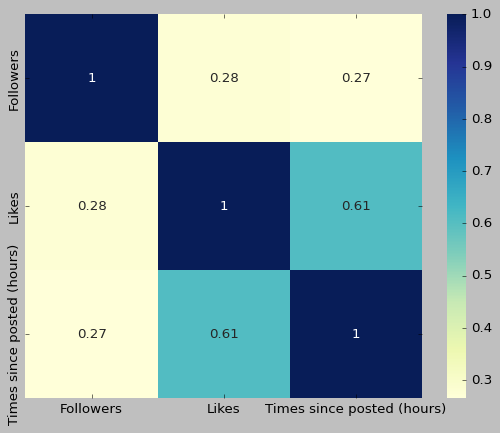

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

- There is strong correlation between likes and times since posted in hours

### **Modelling**

- Predicting reach with XGBRegressor

In [65]:
# Define x variables and y variable
X = df[['Followers', 'Times since posted (hours)']]
y = df['Likes']
df.head()

# Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Fit the model and predict the value of test set
model = XGBRegressor()
model.fit(X_train, y_train)

# Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 18.272 (8.974)


- The XGBoost model achieved a mean MAE of 18.272 and MAE std of 8.974

**Using Linear Regression**

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

# Evaluate the model
scores = cross_val_score(lin_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 17.737 (11.099)


- The Linear Regression model achieved a mean MAE of 17.737 and MAE std of 11.099.

In [69]:
# Check coefficient of determination of linear regression model
r_sq = lin_reg.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3814063866179843


Linear Regression model is not better than XGBoost

In [70]:
# Predict new value using XGBoost
X_new = np.array([[240, 7]])
model.predict(X_new)

array([0.13489202], dtype=float32)

**Summary**

This is how you can analyze and predict the likes of Instagram posts with machine learning using Python. With this notebook, we could know the example of Data Science role in social media.